In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Veriyi yükleme
data = pd.read_csv("C:/Users/caner/OneDrive/Documents/GitHub/TelcoCustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [39]:
# Veri setine genel bakış
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [40]:
print(data.info())  # Veri türleri ve eksik değerler hakkında genel bilgi


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
print(data.describe())  # Sayısal sütunların istatistiksel özetini görüntüleme


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [42]:
# Eksik değerlerin kontrolü
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


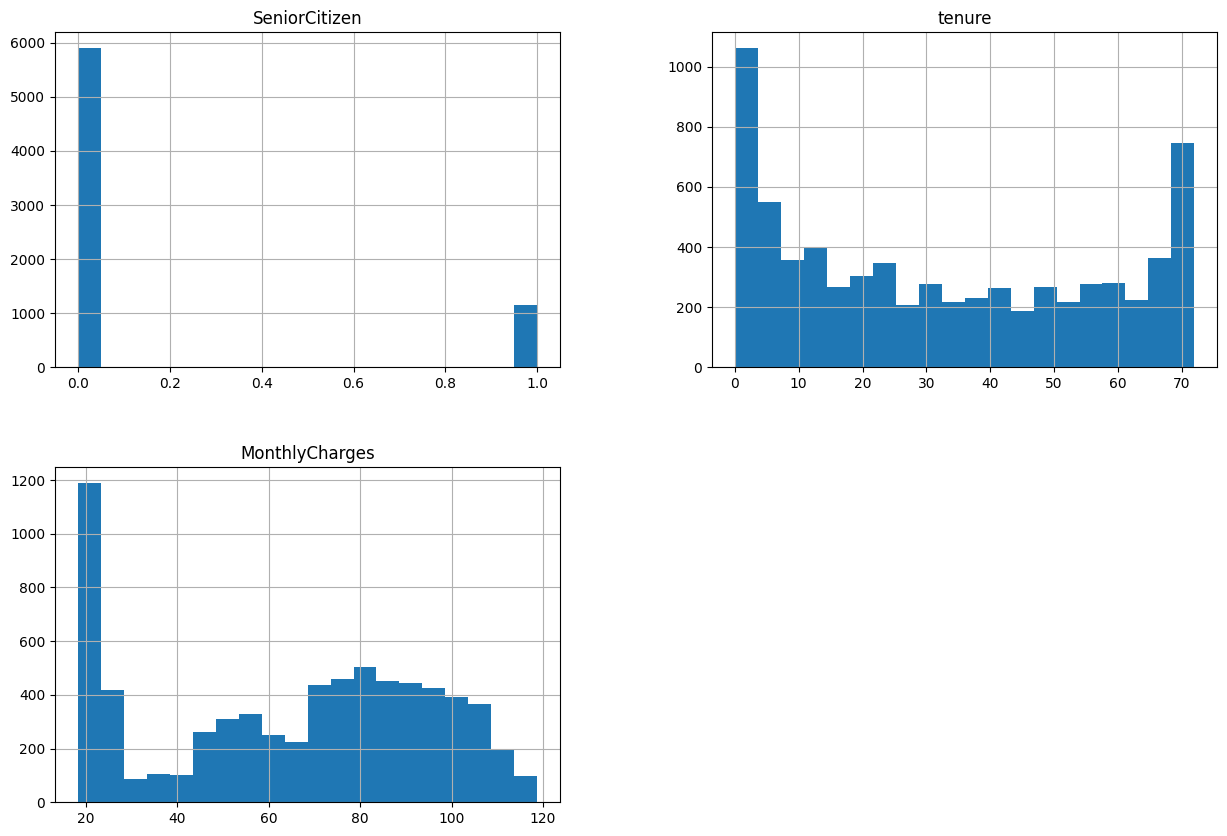

In [43]:
# Veri görselleştirme
# Histogramlar
data.hist(bins=20, figsize=(15, 10))
plt.show()

In [44]:
# Korelasyon Matrisi
# Öncelikle, kategorik verileri sayısal verilere dönüştürmemiz gerekiyor
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

In [45]:
# Sadece sayısal sütunları seçme
numerical_data = data.select_dtypes(include=[np.number])

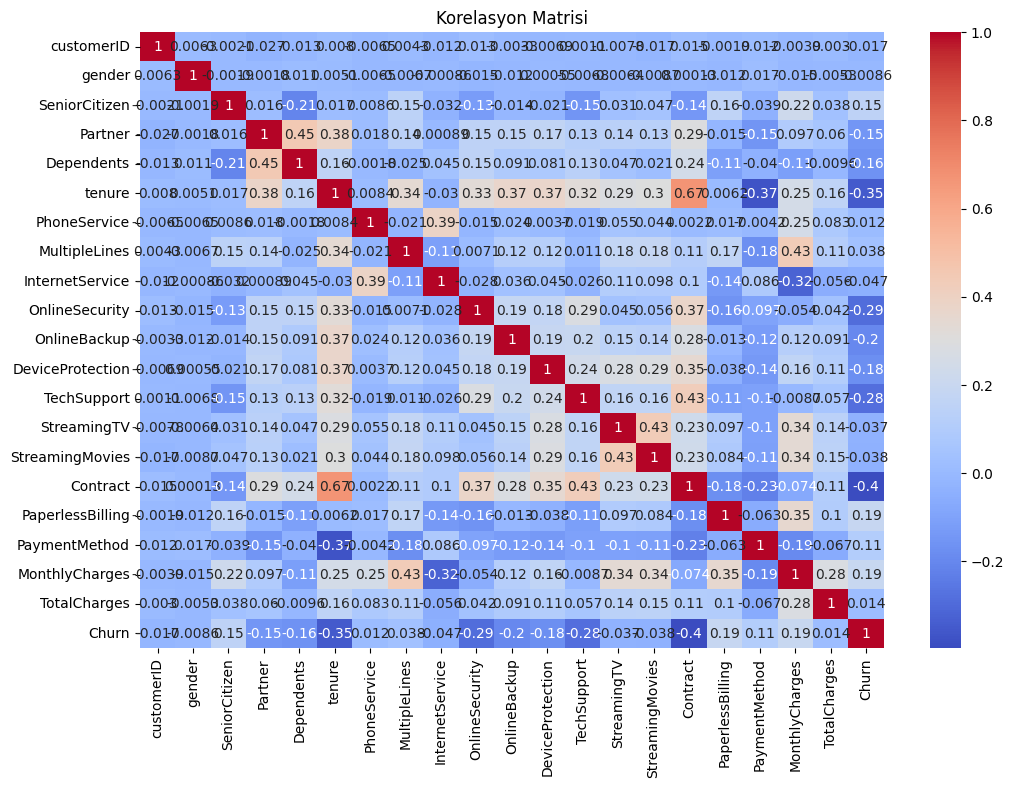

In [46]:
# Korelasyon matrisini hesaplama
corr_matrix = numerical_data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [47]:
# Müşteri terk analizi
# Terk eden ve etmeyen müşteri sayıları
churn_counts = data['Churn'].value_counts()
print(churn_counts)


Churn
0    5174
1    1869
Name: count, dtype: int64


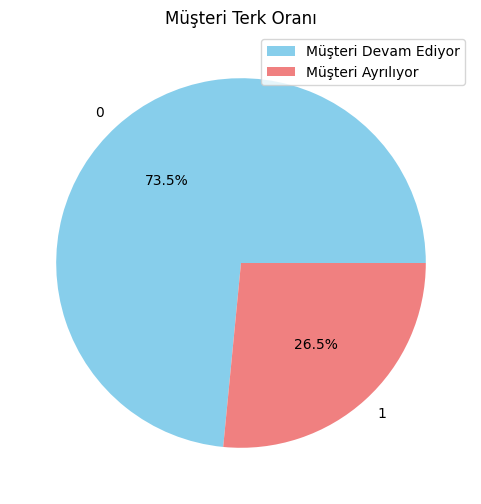

In [48]:
# Müşteri terk oranı görselleştirme
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Müşteri Terk Oranı')
plt.legend(['Müşteri Devam Ediyor', 'Müşteri Ayrılıyor'], loc='best')  # Renkleri ve etiketleri açıklama ekleme
plt.show()
